# The Lifecycle of a Plot
Method for building a complete visualization using matplotlib best practices and features.
Axes: an individual plot
Axis: x/y axis of a plot

#### Imports

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as FuncFormatter

#### Create some dummy data

In [6]:
data = {'Barton LLC': 109438.50,
        'Frami, Hills and Schmidt': 103569.59,
        'Fritsch, Russel and Anderson': 112214.71,
        'Jerde-Hilpert': 112591.43,
        'Keeling LLC': 100934.30,
        'Koepp Ltd': 103660.54,
        'Kulas Inc': 137351.96,
        'Trantow-Barrows': 123381.38,
        'White-Trantow': 135841.99,
        'Will LLC': 104437.60}
group_data = list(data.values())
group_names = list(data.keys())
group_mean = np.mean(group_data)

### Object-Oriented approach
The first step is to generate a figure and axes.  The figure is the workspace where individual plots (axes) are created.

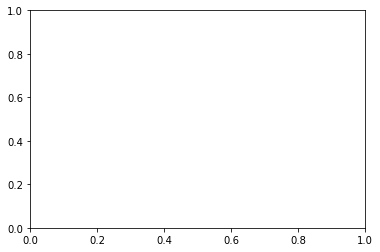

In [11]:
fig, ax = plt.subplots()

Use the figure and the axes to plot a bar graph.

<BarContainer object of 10 artists>

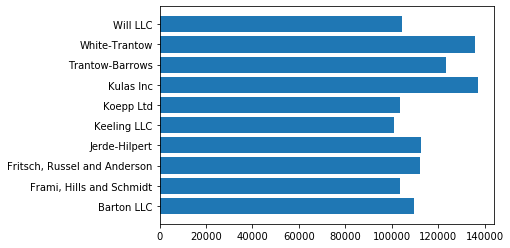

In [13]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)

#### Styling the Graph
See all available styles.

In [14]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


#### Remake the graph with a chosen style

<BarContainer object of 10 artists>

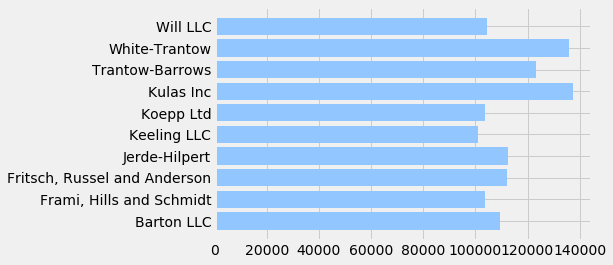

In [17]:
plt.style.use('seaborn-pastel')
fig, ax = plt.subplots()
ax.barh(group_names, group_data)

### Customizing the Plot

Use the setp function to set multiple things at once:
* rotation of labels
* alignment of labels

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

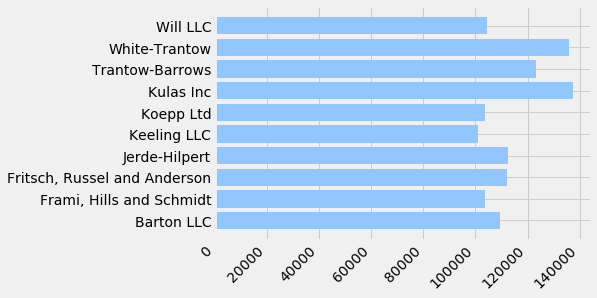

In [18]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()  # gets access to the labels
plt.setp(labels, rotation=45, horizontalalignment='right')

Automatically make room for elements.

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

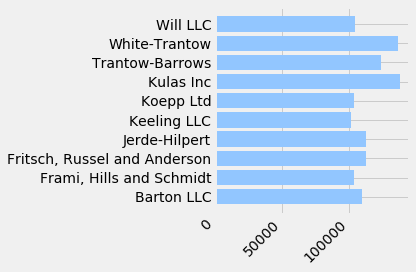

In [19]:
plt.rcParams.update({'figure.autolayout': True})
fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

#### Add labels to the plot and adjust size
numpy indexing (row, column)
figsize (width, height)

[Text(0, 0.5, 'Company'),
 (-10000, 140000),
 Text(0.5, 0, 'Total Revenue'),
 Text(0.5, 1.0, 'Company Revenue')]

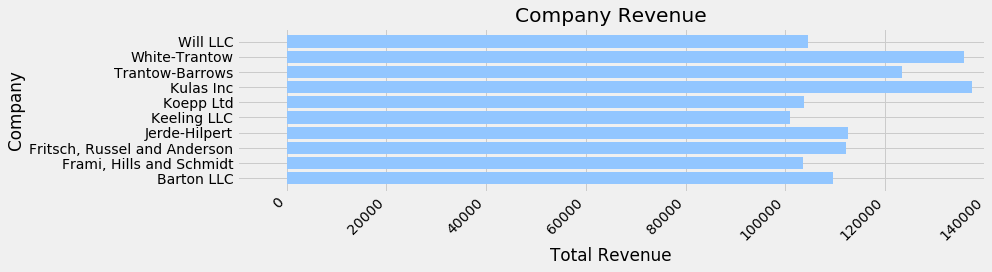

In [22]:
fig, ax = plt.subplots(figsize=(14, 4))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
       title='Company Revenue')

#### Formatting ticks using FuncFormatter
Create a custom function to format the tics and use this to format the numbers, etc.

In [29]:
def currency(x, pos):
    """The two args are the value and tick position"""
    if x >= 1e6:
        s = '${:1.1f}M'.format(x*1e-6)
    else:
        s = '${:1.0f}K'.format(x*1e-3)
    return s


formatter = FuncFormatter.FuncFormatter(currency)


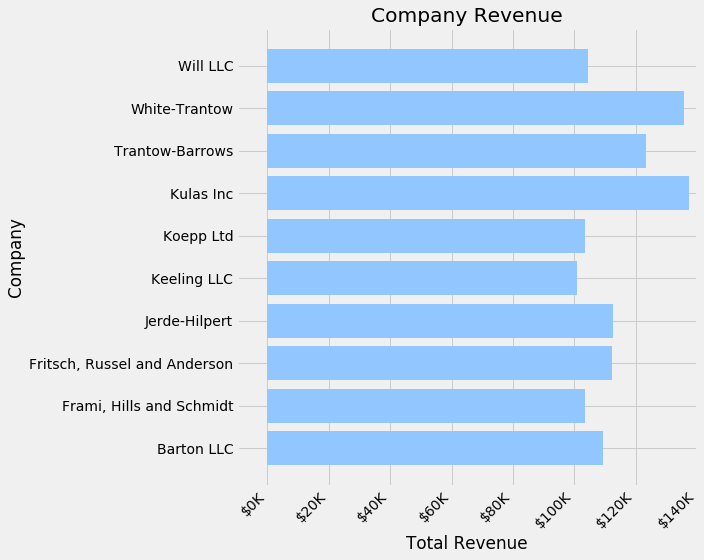

In [32]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
       title='Company Revenue')
ax.xaxis.set_major_formatter(formatter)

## Combine Multiple Visualizations
Draw multiple plots on one axes

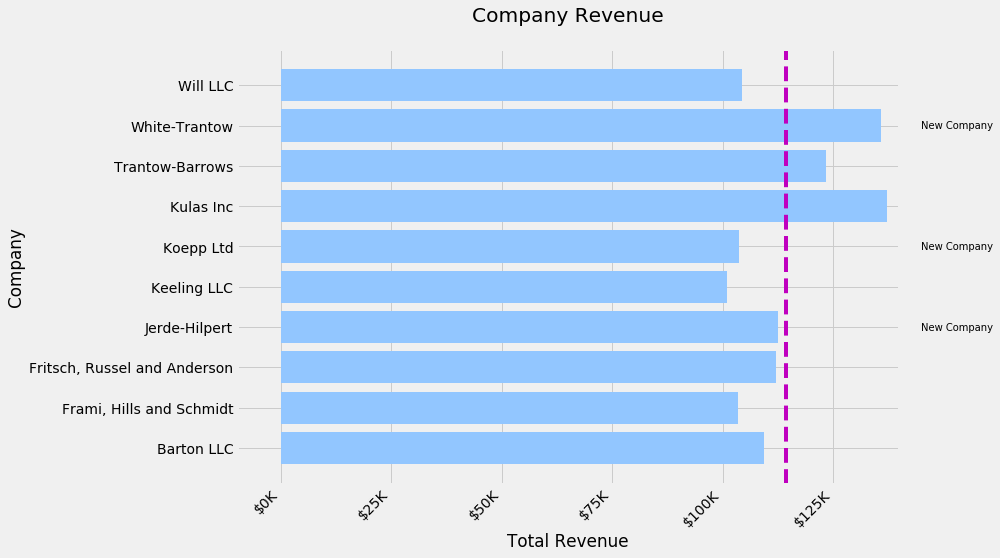

In [36]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

# add a vertical line
ax. axvline(group_mean, ls='--', color='m')

# annotate new companies
for group in [3, 5, 8]:
    ax.text(145000, group, 'New Company', fontsize=10, verticalalignment='center')
    
# adjust title upwards
ax.title.set(y=1.05)



ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
       title='Company Revenue')
ax.xaxis.set_major_formatter(formatter)
ax.set_xticks([0, 25e3, 50e3, 75e3, 100e3, 125e3])
fig.subplots_adjust(right=.1)

plt.show()

### Output the Chart
see available types

In [37]:
print(fig.canvas.get_supported_filetypes())

{'ps': 'Postscript', 'eps': 'Encapsulated Postscript', 'pdf': 'Portable Document Format', 'pgf': 'PGF code for LaTeX', 'png': 'Portable Network Graphics', 'raw': 'Raw RGBA bitmap', 'rgba': 'Raw RGBA bitmap', 'svg': 'Scalable Vector Graphics', 'svgz': 'Scalable Vector Graphics', 'jpg': 'Joint Photographic Experts Group', 'jpeg': 'Joint Photographic Experts Group', 'tif': 'Tagged Image File Format', 'tiff': 'Tagged Image File Format'}


#### Important flags
transparent=True, image background transparent
dpi=80, the resolution of the output
bbox_inches='tight', fits the bounds of the figure to the plot

In [38]:
fig.savefig('sales.png', transparent=False, dpi=80, bbox_inches="tight")